## Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Preprocessing - Weather

In [2]:
weather = pd.read_csv("raw_data/weather.csv", parse_dates=['Date'], na_values=['M','-'])
print(weather.shape)
weather.head()

(2944, 22)


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67.0,14.0,51,56.0,0.0,2.0,...,,0.0,NaN,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,NaN,51,57.0,0.0,3.0,...,,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51.0,-3.0,42,47.0,14.0,0.0,...,BR,0.0,NaN,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52.0,NaN,42,47.0,13.0,0.0,...,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,2.0,40,48.0,9.0,0.0,...,,0.0,NaN,0.0,0.00,29.39,30.12,11.7,7,11.9


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2933 non-null   float64       
 5   Depart       1472 non-null   float64       
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2940 non-null   float64       
 8   Heat         2933 non-null   float64       
 9   Cool         2933 non-null   float64       
 10  Sunrise      1472 non-null   float64       
 11  Sunset       1472 non-null   float64       
 12  CodeSum      2944 non-null   object        
 13  Depth        1472 non-null   float64       
 14  Water1       0 non-null      float64       
 15  SnowFall     1472 non-null   object        
 16  Precip

The Water1 column has 0 non-null. The whole column is empty and therefore dropped

In [4]:
weather = weather.drop(columns=['Water1'])

As seen from output above, CodeSum, SnowFall, PrecipTotal is non numerical. CodeSum is weather type and therefore is correct but SnowFall and PrecipTotal are both in inches and suppose to be numerical. The values in both columns will be inspected.

In [5]:
print(weather['SnowFall'].unique())
print(weather['PrecipTotal'].unique())

['0.0' nan '  T' '0.1']
['0.00' '  T' '0.13' '0.02' '0.38' '0.60' '0.14' '0.07' '0.11' '0.09'
 '1.01' '0.28' '0.04' '0.08' '0.01' '0.53' '0.19' '0.21' '0.32' '0.39'
 '0.31' '0.42' '0.27' '0.16' '0.58' '0.93' '0.05' '0.34' '0.15' '0.35' nan
 '0.40' '0.66' '0.30' '0.24' '0.43' '1.55' '0.92' '0.89' '0.17' '0.03'
 '1.43' '0.97' '0.26' '1.31' '0.06' '0.46' '0.29' '0.23' '0.41' '0.45'
 '0.83' '1.33' '0.91' '0.48' '0.37' '0.88' '2.35' '1.96' '0.20' '0.25'
 '0.18' '0.67' '0.36' '0.33' '1.28' '0.74' '0.76' '0.71' '0.95' '1.46'
 '0.12' '0.52' '0.64' '0.22' '1.24' '0.72' '0.73' '0.65' '1.61' '1.22'
 '0.50' '1.05' '2.43' '0.59' '2.90' '2.68' '1.23' '0.62' '6.64' '3.07'
 '1.44' '1.75' '0.82' '0.80' '0.86' '0.63' '0.55' '1.03' '0.70' '1.73'
 '1.38' '0.44' '1.14' '1.07' '3.97' '0.87' '0.78' '1.12' '0.68' '0.10'
 '0.61' '0.54' '1.19' '0.75' '0.84' '1.29' '0.81' '1.15' '1.49' '1.57'
 '1.02' '1.30' '0.51' '0.85' '0.79' '0.77' '2.79' '3.15' '3.64' '4.73'
 '1.60' '0.57' '2.24' '1.90' '1.06' '1.88' '0.69' 

From the documentation, it is shown that T represents trace amount and therefore replaced with 0 as it is negligible in the analysis.

In [6]:
# Replacing SnowFall 'T' with 0
weather['SnowFall'] = weather['SnowFall'].replace('  T', 0).astype(float)

# Replacing PrecipTotal 'T' with 0
weather['PrecipTotal'] = weather['PrecipTotal'].replace('  T', 0).astype(float)

In [7]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,CodeSum,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67.0,14.0,51,56.0,0.0,2.0,...,1849.0,,0.0,0.0,0.0,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,NaN,51,57.0,0.0,3.0,...,NaN,,NaN,NaN,0.0,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51.0,-3.0,42,47.0,14.0,0.0,...,1850.0,BR,0.0,0.0,0.0,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52.0,NaN,42,47.0,13.0,0.0,...,NaN,BR HZ,NaN,NaN,0.0,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,2.0,40,48.0,9.0,0.0,...,1851.0,,0.0,0.0,0.0,29.39,30.12,11.7,7,11.9


In [8]:
weather['Station'].value_counts()

1    1472
2    1472
Name: Station, dtype: int64

In [9]:
weather[weather['Station']==1].isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        3
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
SnowFall       0
PrecipTotal    0
StnPressure    2
SeaLevel       5
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [10]:
weather[weather['Station']==2].isnull().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg             11
Depart         1472
DewPoint          0
WetBulb           1
Heat             11
Cool             11
Sunrise        1472
Sunset         1472
CodeSum           0
Depth          1472
SnowFall       1472
PrecipTotal       2
StnPressure       2
SeaLevel          4
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

The two list shows that station 2 does not any data on 3 categories, which is probably due to lack of equipment. The 2 stations are around 25km away from one another with around 15mtr difference in height. Assumption will be made that both stations will be having the same reading for those missing data

In [11]:
weather.fillna(method='ffill', inplace=True)
weather

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,Sunset,CodeSum,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67.0,14.0,51,56.0,0.0,2.0,...,1849.0,,0.0,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,14.0,51,57.0,0.0,3.0,...,1849.0,,0.0,0.0,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51.0,-3.0,42,47.0,14.0,0.0,...,1850.0,BR,0.0,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52.0,-3.0,42,47.0,13.0,0.0,...,1850.0,BR HZ,0.0,0.0,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,2.0,40,48.0,9.0,0.0,...,1851.0,,0.0,0.0,0.00,29.39,30.12,11.7,7,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,45.0,-4.0,34,42.0,20.0,0.0,...,1650.0,,0.0,0.0,0.00,29.42,30.07,8.5,29,9.0
2940,1,2014-10-30,51,32,42.0,-4.0,34,40.0,23.0,0.0,...,1649.0,,0.0,0.0,0.00,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45.0,-4.0,35,42.0,20.0,0.0,...,1649.0,RA,0.0,0.0,0.00,29.41,30.10,5.9,23,6.5
2942,1,2014-10-31,47,33,40.0,-6.0,25,33.0,25.0,0.0,...,1647.0,RA SN,0.0,0.1,0.03,29.49,30.20,22.6,34,22.9


Next, the **CodeSum** column will be tidied out into the list of groups of its individual meaning for further label encoding in order to be used in the model afterwards.

In [12]:
# Initial Check of all the parameters within CodeSum column
weather['CodeSum'].unique()

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

In [13]:
# Replacing 'No sign' with 'MD' for moderate
weather['CodeSum'] = weather['CodeSum'].replace(' ', 'MD').astype(str)
weather.loc[:,'CodeSum'] = weather.loc[:,'CodeSum'].str.split()

In [14]:
# Breaking down all data in each column into 1 unique list for label encoding
total = []
for value in weather['CodeSum']:
    for items in value:
        if items not in total:
            total.append(items)
print(total)

['MD', 'BR', 'HZ', 'RA', 'TSRA', 'VCTS', 'FU', 'TS', 'DZ', 'BCFG', 'FG+', 'MIFG', 'FG', 'SQ', 'SN', 'VCFG', 'GR']


In [15]:
# label encoding of CodeSum
weather[total]=0
for index,value in enumerate(weather['CodeSum']):
    for items in value:
        weather.loc[index,items]=1
# weather = weather.drop(columns=['CodeSum'])

In [16]:
# check weather dataframe after label encoding
weather[total].describe()

,MD,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,FG,SQ,SN,VCFG,GR
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.00000
mean,0.546535,0.276155,0.089334,0.317595,0.103601,0.006454,0.003057,0.034647,0.045177,0.001698,0.009171,0.001019,0.005435,0.001019,0.002038,0.001359,0.00034
std,0.497914,0.447170,0.285274,0.465620,0.304793,0.080090,0.055216,0.182914,0.207727,0.041183,0.095342,0.031911,0.073533,0.031911,0.045106,0.036842,0.01843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [17]:
final_weather = weather.groupby('Date').mean().drop('Station', axis=1).reset_index()
final_weather.head()

,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,...,TS,DZ,BCFG,FG+,MIFG,FG,SQ,SN,VCFG,GR
0,2007-05-01,83.5,51.0,67.5,14.0,51.0,56.5,0.0,2.5,448.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007-05-02,59.5,42.5,51.5,-3.0,42.0,47.0,13.5,0.0,447.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007-05-03,66.5,47.0,57.0,2.0,40.0,49.0,8.0,0.0,446.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007-05-04,72.0,50.0,58.0,4.0,41.5,50.0,7.0,0.0,444.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007-05-05,66.0,53.5,60.0,5.0,38.5,49.5,5.0,0.0,443.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
final_weather.columns

Index(['Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat',
       'Cool', 'Sunrise', 'Sunset', 'Depth', 'SnowFall', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'MD',
       'BR', 'HZ', 'RA', 'TSRA', 'VCTS', 'FU', 'TS', 'DZ', 'BCFG', 'FG+',
       'MIFG', 'FG', 'SQ', 'SN', 'VCFG', 'GR'],
      dtype='object')

In [19]:
# Replace all 0.5 in weather condition with 1
final_weather.loc[:, 'MD':] = final_weather.loc[:, 'MD':].apply(np.ceil).astype(int)
final_weather.head()

,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,...,TS,DZ,BCFG,FG+,MIFG,FG,SQ,SN,VCFG,GR
0,2007-05-01,83.5,51.0,67.5,14.0,51.0,56.5,0.0,2.5,448.0,...,0,0,0,0,0,0,0,0,0,0
1,2007-05-02,59.5,42.5,51.5,-3.0,42.0,47.0,13.5,0.0,447.0,...,0,0,0,0,0,0,0,0,0,0
2,2007-05-03,66.5,47.0,57.0,2.0,40.0,49.0,8.0,0.0,446.0,...,0,0,0,0,0,0,0,0,0,0
3,2007-05-04,72.0,50.0,58.0,4.0,41.5,50.0,7.0,0.0,444.0,...,0,0,0,0,0,0,0,0,0,0
4,2007-05-05,66.0,53.5,60.0,5.0,38.5,49.5,5.0,0.0,443.0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
final_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1472 non-null   datetime64[ns]
 1   Tmax         1472 non-null   float64       
 2   Tmin         1472 non-null   float64       
 3   Tavg         1472 non-null   float64       
 4   Depart       1472 non-null   float64       
 5   DewPoint     1472 non-null   float64       
 6   WetBulb      1472 non-null   float64       
 7   Heat         1472 non-null   float64       
 8   Cool         1472 non-null   float64       
 9   Sunrise      1472 non-null   float64       
 10  Sunset       1472 non-null   float64       
 11  Depth        1472 non-null   float64       
 12  SnowFall     1472 non-null   float64       
 13  PrecipTotal  1472 non-null   float64       
 14  StnPressure  1472 non-null   float64       
 15  SeaLevel     1472 non-null   float64       
 16  Result

In [21]:
def change_time(data):
    
    hour = int(data/100)
    minute=int(data)%100
    
    time_float = hour + minute/60
    return time_float

In [22]:
final_weather.loc[:,'Sunrise'] = final_weather.loc[:,'Sunrise'].apply(change_time)
final_weather.loc[:,'Sunset'] = final_weather.loc[:,'Sunset'].apply(change_time)

## Preprocessing - Train

In [23]:
train = pd.read_csv("raw_data/train.csv")
test = pd.read_csv("raw_data/test.csv")
print(train.shape)
train.head()

(10506, 12)


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [24]:
train.isna().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [25]:
train['Date']=pd.to_datetime(train['Date'])
test['Date']=pd.to_datetime(test['Date'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    10506 non-null  datetime64[ns]
 1   Address                 10506 non-null  object        
 2   Species                 10506 non-null  object        
 3   Block                   10506 non-null  int64         
 4   Street                  10506 non-null  object        
 5   Trap                    10506 non-null  object        
 6   AddressNumberAndStreet  10506 non-null  object        
 7   Latitude                10506 non-null  float64       
 8   Longitude               10506 non-null  float64       
 9   AddressAccuracy         10506 non-null  int64         
 10  NumMosquitos            10506 non-null  int64         
 11  WnvPresent              10506 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), ob

In [26]:
train_join = train.copy()
train_join = train_join.drop(columns=['Address','Block','Street','AddressNumberAndStreet','AddressAccuracy'])
train_join.drop_duplicates(inplace=True)
train_join

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0
...,...,...,...,...,...,...,...
10501,2013-09-26,CULEX PIPIENS/RESTUANS,T035,41.763733,-87.742302,6,1
10502,2013-09-26,CULEX PIPIENS/RESTUANS,T231,41.987280,-87.666066,5,0
10503,2013-09-26,CULEX PIPIENS/RESTUANS,T232,41.912563,-87.668055,1,0
10504,2013-09-26,CULEX PIPIENS/RESTUANS,T233,42.009876,-87.807277,5,0


In [27]:
test = test.copy()
test = test.drop(columns=['Address','Block','Street','AddressNumberAndStreet','AddressAccuracy','Trap'])
test.head()

,Id,Date,Species,Latitude,Longitude
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,41.95469,-87.800991
1,2,2008-06-11,CULEX RESTUANS,41.95469,-87.800991
2,3,2008-06-11,CULEX PIPIENS,41.95469,-87.800991
3,4,2008-06-11,CULEX SALINARIUS,41.95469,-87.800991
4,5,2008-06-11,CULEX TERRITANS,41.95469,-87.800991


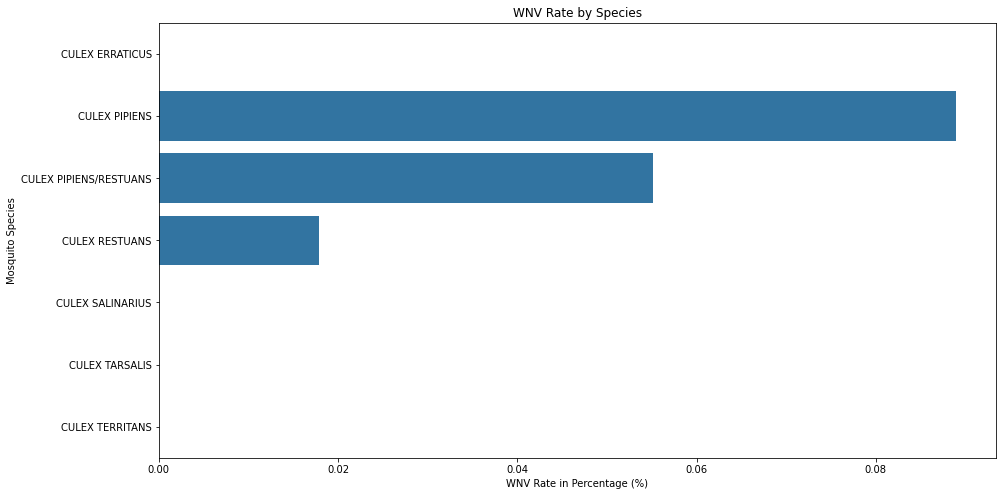

In [55]:
# Check and plot on the WNV risk of each mosquito species
Wnv_Present = train.groupby('Species').mean()

plt.figure(figsize=(15,8))
sns.barplot(data=Wnv_Present, y=Wnv_Present.index, x='WnvPresent', orient='h', color='tab:blue',)
plt.title('WNV Rate by Species')
plt.xlabel('WNV Rate in Percentage (%)')
plt.ylabel('Mosquito Species')
plt.show()

From the series above we can see from the **WnvPresent** that only 2 species of mosquitoes bear the West Nile Virus, namely **Culex Pipiens** and **Culex Restuans**. The 3 significant group of mosquitoes will be grouped into **CULEX PIPIENS/RESTUANS** while the rest of the mosquito species will be grouped as **Others** as they do not bear any West Nile Virus at all.

In [29]:
# Grouping the 3 CULEX PIPIENS, CULEX RESTUANS, and CULEX PIPIENS/RESTUANS into 1 group

replace_group = {
    'CULEX PIPIENS' : 'CULEX PIPIENS/RESTUANS',
    'CULEX RESTUANS' : 'CULEX PIPIENS/RESTUANS'
}

train_join['Species'] = train_join['Species'].replace(replace_group)

# Replacing mosquito species with zero WNV risk with '0'
# So it would be dropped automatically during one-hot encoding
replace_dict = {
    'CULEX ERRATICUS': '0',
    'CULEX SALINARIUS': '0',
    'CULEX TARSALIS': '0',
    'CULEX TERRITANS': '0'
}

# Apply the mapping dict on both train and test set
train_join['Species'] = train_join['Species'].replace(replace_dict)
test['Species'] = test['Species'].replace(replace_dict)

As mentioned, test results are organized in such a way that when the number of mosquitos exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitos are capped at 50. The dataframe is further organized to combine mosquito counts of same day at same location together before training

In [30]:
spray = pd.read_csv("raw_data/spray.csv")
print(spray.shape)
spray.head()

(14835, 4)


,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [31]:
spray['Date']=pd.to_datetime(spray['Date'])
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14835 non-null  datetime64[ns]
 1   Time       14251 non-null  object        
 2   Latitude   14835 non-null  float64       
 3   Longitude  14835 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 463.7+ KB


For pesticide spraying record, time column is dropped as the timing for the spray is irrelevant, assumption is made that the spray will last for at least days so what time does the spraying occurs does not matter. Lastly, the size of the data is checked

None of the pesticide spraying location and mosquitoes trap location are overlapped. Distance of the mosquitoes trap to the nearest spraying location will need to be calculated. Euclidean distance will be used as the first attempt.

In [32]:
# Function convert spraying data to a binary column

def spraying_calc(df, radius=100, period=14):
    
    lat = df['Latitude']
    lon = df['Longitude']
    check_date = df['Date']
    
    # Calculate spray_date given a effective period as args
    spray_date = check_date - dt.timedelta(days=period)
    
    # Filtering list of spraying date that is within 14 days from mosquitos trap date
    sprays = spray[(spray['Date']<=check_date) & (spray['Date']>spray_date)]
    
    # Checking if any mosquitoe trap is nearby any spraying activity during the spray effective period
    for idx in sprays.index:
        lat_2 = sprays.loc[idx, 'Latitude']
        lon_2 = sprays.loc[idx, 'Longitude']
        
        # Calculate Euclidean distance between coordinates (meters)
        distance = ((lat - lat_2)**2 + (lon - lon_2)**2) ** 0.5 * 100000
        
        # Return 1 if distance shorter than effective radius
        if distance <= radius:
            return 1
        
    # Return 0 if none found
    return 0

In [33]:
train_join['Sprayed'] = train_join.apply(spraying_calc, axis=1)

# Number of 1 in 'Sprayed' in train.csv
print("Number of Sprayed Cases in trainset: ", train_join['Sprayed'].sum())

Number of Sprayed Cases in trainset:  47


In [34]:
# Merging of trainset with weather data
train_join = pd.merge(train_join, final_weather, how = 'left', on='Date')
train_join.shape

(9693, 43)

In [35]:
test['Sprayed'] = test.apply(spraying_calc, axis=1)
test = pd.merge(test, final_weather, how = 'left', on='Date')
test.shape

(116293, 41)

In [36]:
# Export the cleaned and engineered dataset to CSV
train_join.to_csv('process_data/train_final.csv', index=False)
test.to_csv('process_data/test_final.csv', index=False)

In [37]:
test

,Id,Date,Species,Latitude,Longitude,Sprayed,Tmax,Tmin,Tavg,Depart,...,TS,DZ,BCFG,FG+,MIFG,FG,SQ,SN,VCFG,GR
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,0,86.0,63.5,75.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,2,2008-06-11,CULEX RESTUANS,41.954690,-87.800991,0,86.0,63.5,75.0,7.0,...,0,0,0,0,0,0,0,0,0,0
2,3,2008-06-11,CULEX PIPIENS,41.954690,-87.800991,0,86.0,63.5,75.0,7.0,...,0,0,0,0,0,0,0,0,0,0
3,4,2008-06-11,0,41.954690,-87.800991,0,86.0,63.5,75.0,7.0,...,0,0,0,0,0,0,0,0,0,0
4,5,2008-06-11,0,41.954690,-87.800991,0,86.0,63.5,75.0,7.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116288,116289,2014-10-02,0,41.925652,-87.633590,0,73.5,64.5,69.5,10.0,...,0,0,0,0,0,0,0,0,0,0
116289,116290,2014-10-02,0,41.925652,-87.633590,0,73.5,64.5,69.5,10.0,...,0,0,0,0,0,0,0,0,0,0
116290,116291,2014-10-02,0,41.925652,-87.633590,0,73.5,64.5,69.5,10.0,...,0,0,0,0,0,0,0,0,0,0
116291,116292,2014-10-02,UNSPECIFIED CULEX,41.925652,-87.633590,0,73.5,64.5,69.5,10.0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
train_join

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Sprayed,Tmax,Tmin,...,TS,DZ,BCFG,FG+,MIFG,FG,SQ,SN,VCFG,GR
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,0,88.0,62.5,...,0,0,0,0,0,0,0,0,0,0
1,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,0,88.0,62.5,...,0,0,0,0,0,0,0,0,0,0
2,2007-05-29,CULEX PIPIENS/RESTUANS,T007,41.994991,-87.769279,1,0,0,88.0,62.5,...,0,0,0,0,0,0,0,0,0,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0,0,88.0,62.5,...,0,0,0,0,0,0,0,0,0,0
4,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,4,0,0,88.0,62.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9688,2013-09-26,CULEX PIPIENS/RESTUANS,T035,41.763733,-87.742302,6,1,0,75.0,52.5,...,0,0,0,0,0,0,0,0,0,0
9689,2013-09-26,CULEX PIPIENS/RESTUANS,T231,41.987280,-87.666066,5,0,0,75.0,52.5,...,0,0,0,0,0,0,0,0,0,0
9690,2013-09-26,CULEX PIPIENS/RESTUANS,T232,41.912563,-87.668055,1,0,0,75.0,52.5,...,0,0,0,0,0,0,0,0,0,0
9691,2013-09-26,CULEX PIPIENS/RESTUANS,T233,42.009876,-87.807277,5,0,0,75.0,52.5,...,0,0,0,0,0,0,0,0,0,0
